In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import blimpy as bl 
from astropy import coordinates
import astropy.units as u
import mmap
import json
%matplotlib inline

In [7]:
df = pd.read_csv('/datax/scratch/benjb/bl_nearby_stars/BL_star_targets_all_sky.csv')
dvec = df['dist (pc)'].values
print(df.keys())

Index(['Name', 'RA', 'DEC', 'Vmag', 'Sp.Type', 'dist (pc)', 'ObsDate',
       'Unnamed: 7'],
      dtype='object')


In [10]:
print(len(np.where(dvec <= 5.1)[0]))

43


In [5]:
print(df.iloc[np.where(df['Name'].values=='HIP9487')[0]])

       Name         RA       DEC  Vmag Sp.Type  dist (pc)     ObsDate  \
99  HIP9487  2 2 2.85   2 45 49   3.82      A2       42.6  08/13/2020   

    Unnamed: 7  
99         NaN  


In [3]:
dfc = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')
dfc
#dfc.iloc[np.where(dfc['Cadence ID'].values==411390)[0]]

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
36553,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36554,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36555,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36556,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [ ]:
datadir = '/datax/scratch/benjb/bl_nearby_stars/'
target_file = 'nearby_star_targets.txt'
cadence_file = 'nearby_cadences.txt'

star_list = np.loadtxt(datadir+target_file, dtype='str')

#cadence_counts = []
#cadences_within_5_pc = []
#obs_counts = []

csv_array = np.empty((1, 5))

for i in range(len(star_list)):

    star = star_list[i]
    print(i,star)

    block_begin_string = f'{star} ======='

    counter = 0

    #obs_ids = []

    with open(datadir+cadence_file, 'rb', 0) as file, mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ) as s:
        #if s.find(block_begin_string.encode('utf-8')) != -1:
        #    print(i, 'true')
        for line in iter(s.readline, b""):
            if block_begin_string.encode('utf-8') in line:
                start = b'======= '
                end = b'\n'
                # grab number of cadences for each star
                num = int((line.split(start))[1].split(end)[0])
                #cadence_counts.append(num)
                d = dvec[np.where(df['Name'].values==star)[0][0]]
                #if d <= 5.1:
                #    cadences_within_5_pc.append(num)
            elif counter == 0:
                continue
            if (counter <= num):
                #print(counter, line)
                if counter > 0:
                    di = json.loads(line.decode('utf-8'))
                    #print(di['id'])
                    #obs_ids.append(di['id'])
                    param_matrix = np.array([np.array([star, d, di['id'], di['freq'], di['filenames'][i]]) for i in range(len(di['filenames']))])
                    # CONCATENATE ALL MATRICES TOGETHER TO FORM THE CSV
                    csv_array = np.concatenate((csv_array, param_matrix))
                counter += 1
            else:
                break
    #u = np.unique(obs_ids)
    #print(star, num, u)
    #obs_counts.append(len(u))

df0 = pd.DataFrame(data=csv_array[1:], columns=['Target', 'Distance', 'Cadence ID', 'Frequency', '.h5 path'])
df0.to_csv('/datax/scratch/benjb/bl_nearby_stars/star_cadences_catalog_no_band.csv', index=False) 

#print(len(cadence_counts))

0 GJ1002
1 GJ1111
2 GJ1245AC


In [ ]:
'''
print(csv_array[np.where(csv_array[:,0]=='GJ1245AC')[0]].shape)
for i in csv_array[np.where(csv_array[:,0]=='GJ1245AC')[0]]:
    file = i[4]
    print(i)
    #fb = bl.Waterfall(file, load_data=False)
    #fb.info() 
'''

(162, 5)
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_16358_Gj1245ac_0003.gpuspec.0000.h5']
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_16716_Hip97155_0004.gpuspec.0000.h5']
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_17076_Gj1245ac_0005.gpuspec.0000.h5']
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_17434_Hip97486_0006.gpuspec.0000.h5']
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_17793_Gj1245ac_0007.gpuspec.0000.h5']
['GJ1245AC' '4.54' '4838' '1926'
 '/datag/pipeline/AGBT16A_999_241/holding/spliced_blc0001020304050607_guppi_57587_18154_Hip97700_0008.gpuspec.0000.h5']
['GJ1245AC' '4.54' '11899' '2802'
 '/datag/pipeline/AGBT16B_999_62/holdin

In [ ]:
'''
import bldw
c = bldw.Connection()
md = c.fetch_metadata_by_filename('/datag/pipeline/AGBT16B_999_62/holding/spliced_blc0001020304050607_guppi_57697_75735_GJ1245AC_0039.gpuspec.0000.h5')
#for i in md:
#    print(i.__str__())
print(md.__str__())
s = c.fetch_session_for_observation_id(11899)
print(s)
'''

file://pd-datag/pipeline/AGBT16B_999_62/holding/spliced_blc0001020304050607_guppi_57697_75735_GJ1245AC_0039.gpuspec.0000.h5 | 2016-11-05 21:02:15
AGBT16B_999_62


In [ ]:
#file1 = '/datag/pipeline/AGBT16B_999_62/holding/spliced_blc0001020304050607_guppi_57697_75735_GJ1245AC_0039.gpuspec.0000.h5'

#fb1 = bl.Waterfall(file1, load_data=False)
#fb1.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                2802.83203125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        359661568
            nifs :                                1
     source_name :                         GJ1245AC
         src_dej :                     44:24:45.007
         src_raj :                     19:53:54.782
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-11-05T21:02:15.000
    tstart (MJD) :                    57697.8765625
        za_start :                              0.0

Num ints in file :                               16
      File shape :               (16, 1, 35

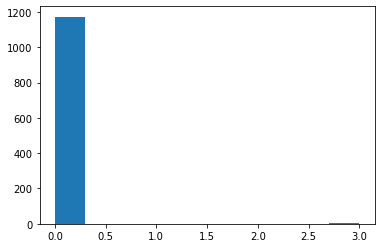

In [ ]:
# plt.hist(obs_counts)
# plt.show()

In [ ]:
# print(np.min(obs_counts))
# print(np.max(obs_counts))
# print(np.sum(obs_counts))
# print(np.where(np.array(obs_counts)==26))

3
26
6258
(array([29]),)


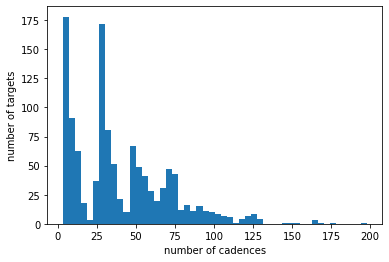

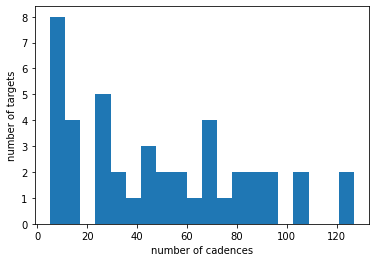

In [ ]:
# plt.hist(cadence_counts, bins=50)
# plt.xlabel('number of cadences')
# plt.ylabel('number of targets')
# plt.show()

# plt.hist(cadences_within_5_pc, bins=20)
# plt.xlabel('number of cadences')
# plt.ylabel('number of targets')
# plt.show()

In [ ]:
#print(f'Total of {np.sum(cadence_counts)} cadences for {len(cadence_counts)} stars in nearby sample.')
#print(f'Total of {np.sum(cadences_within_5_pc)} cadences for {len(cadences_within_5_pc)} stars within 5 pc.')

Total of 47143 cadences for 1180 stars in nearby sample.
Total of 2096 cadences for 43 stars within 5 pc.


In [ ]:
#print(47143*6)

282858
